## Load Basic Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Dataset: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## Reading the csv file

In [9]:
df = pd.read_csv('heart.csv')

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.shape

(303, 14)

## Exploring the data set in order to derive useful information

In [12]:
df.shape

(303, 14)

this shows our data has 303 rows and 14 columns

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

we can see the column names here 

In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Statstical Details
Describe provides us with statistical information in  the numerical format.
we can infer that in the AGE column the minimum age is 29yrs and maximium is 77yrs 
mean of age is 54yrs.
The quartiles details are given in form of 25%, 50% and 75%. The data is divided into 3 quartiles
or 4 equal parts. so 25% values lie in each group.
standard deviation and mean are statistical measures which give us an idea of the central tendency 
of the data set. However , mean is effected by outliers and hence we need more information 
to make accurate decisions.



In [15]:
# Data set is not imbalanced
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [16]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


we notice that the dataset has no null values.
this saved us from conveting the null values into some data or dropping then altogether.

In [18]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

## Finding the correlation among the attributes

<AxesSubplot:>

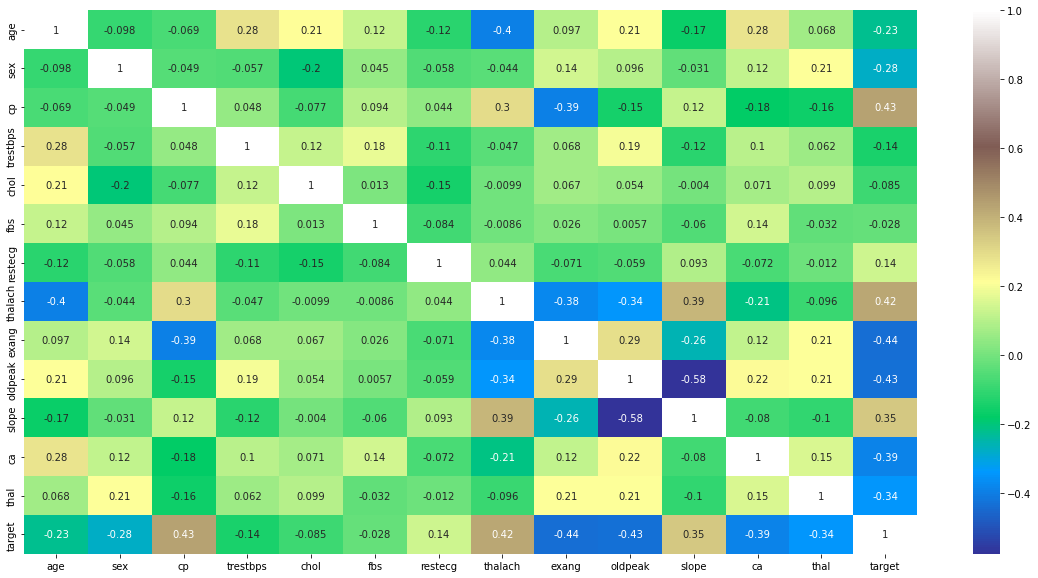

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='terrain')

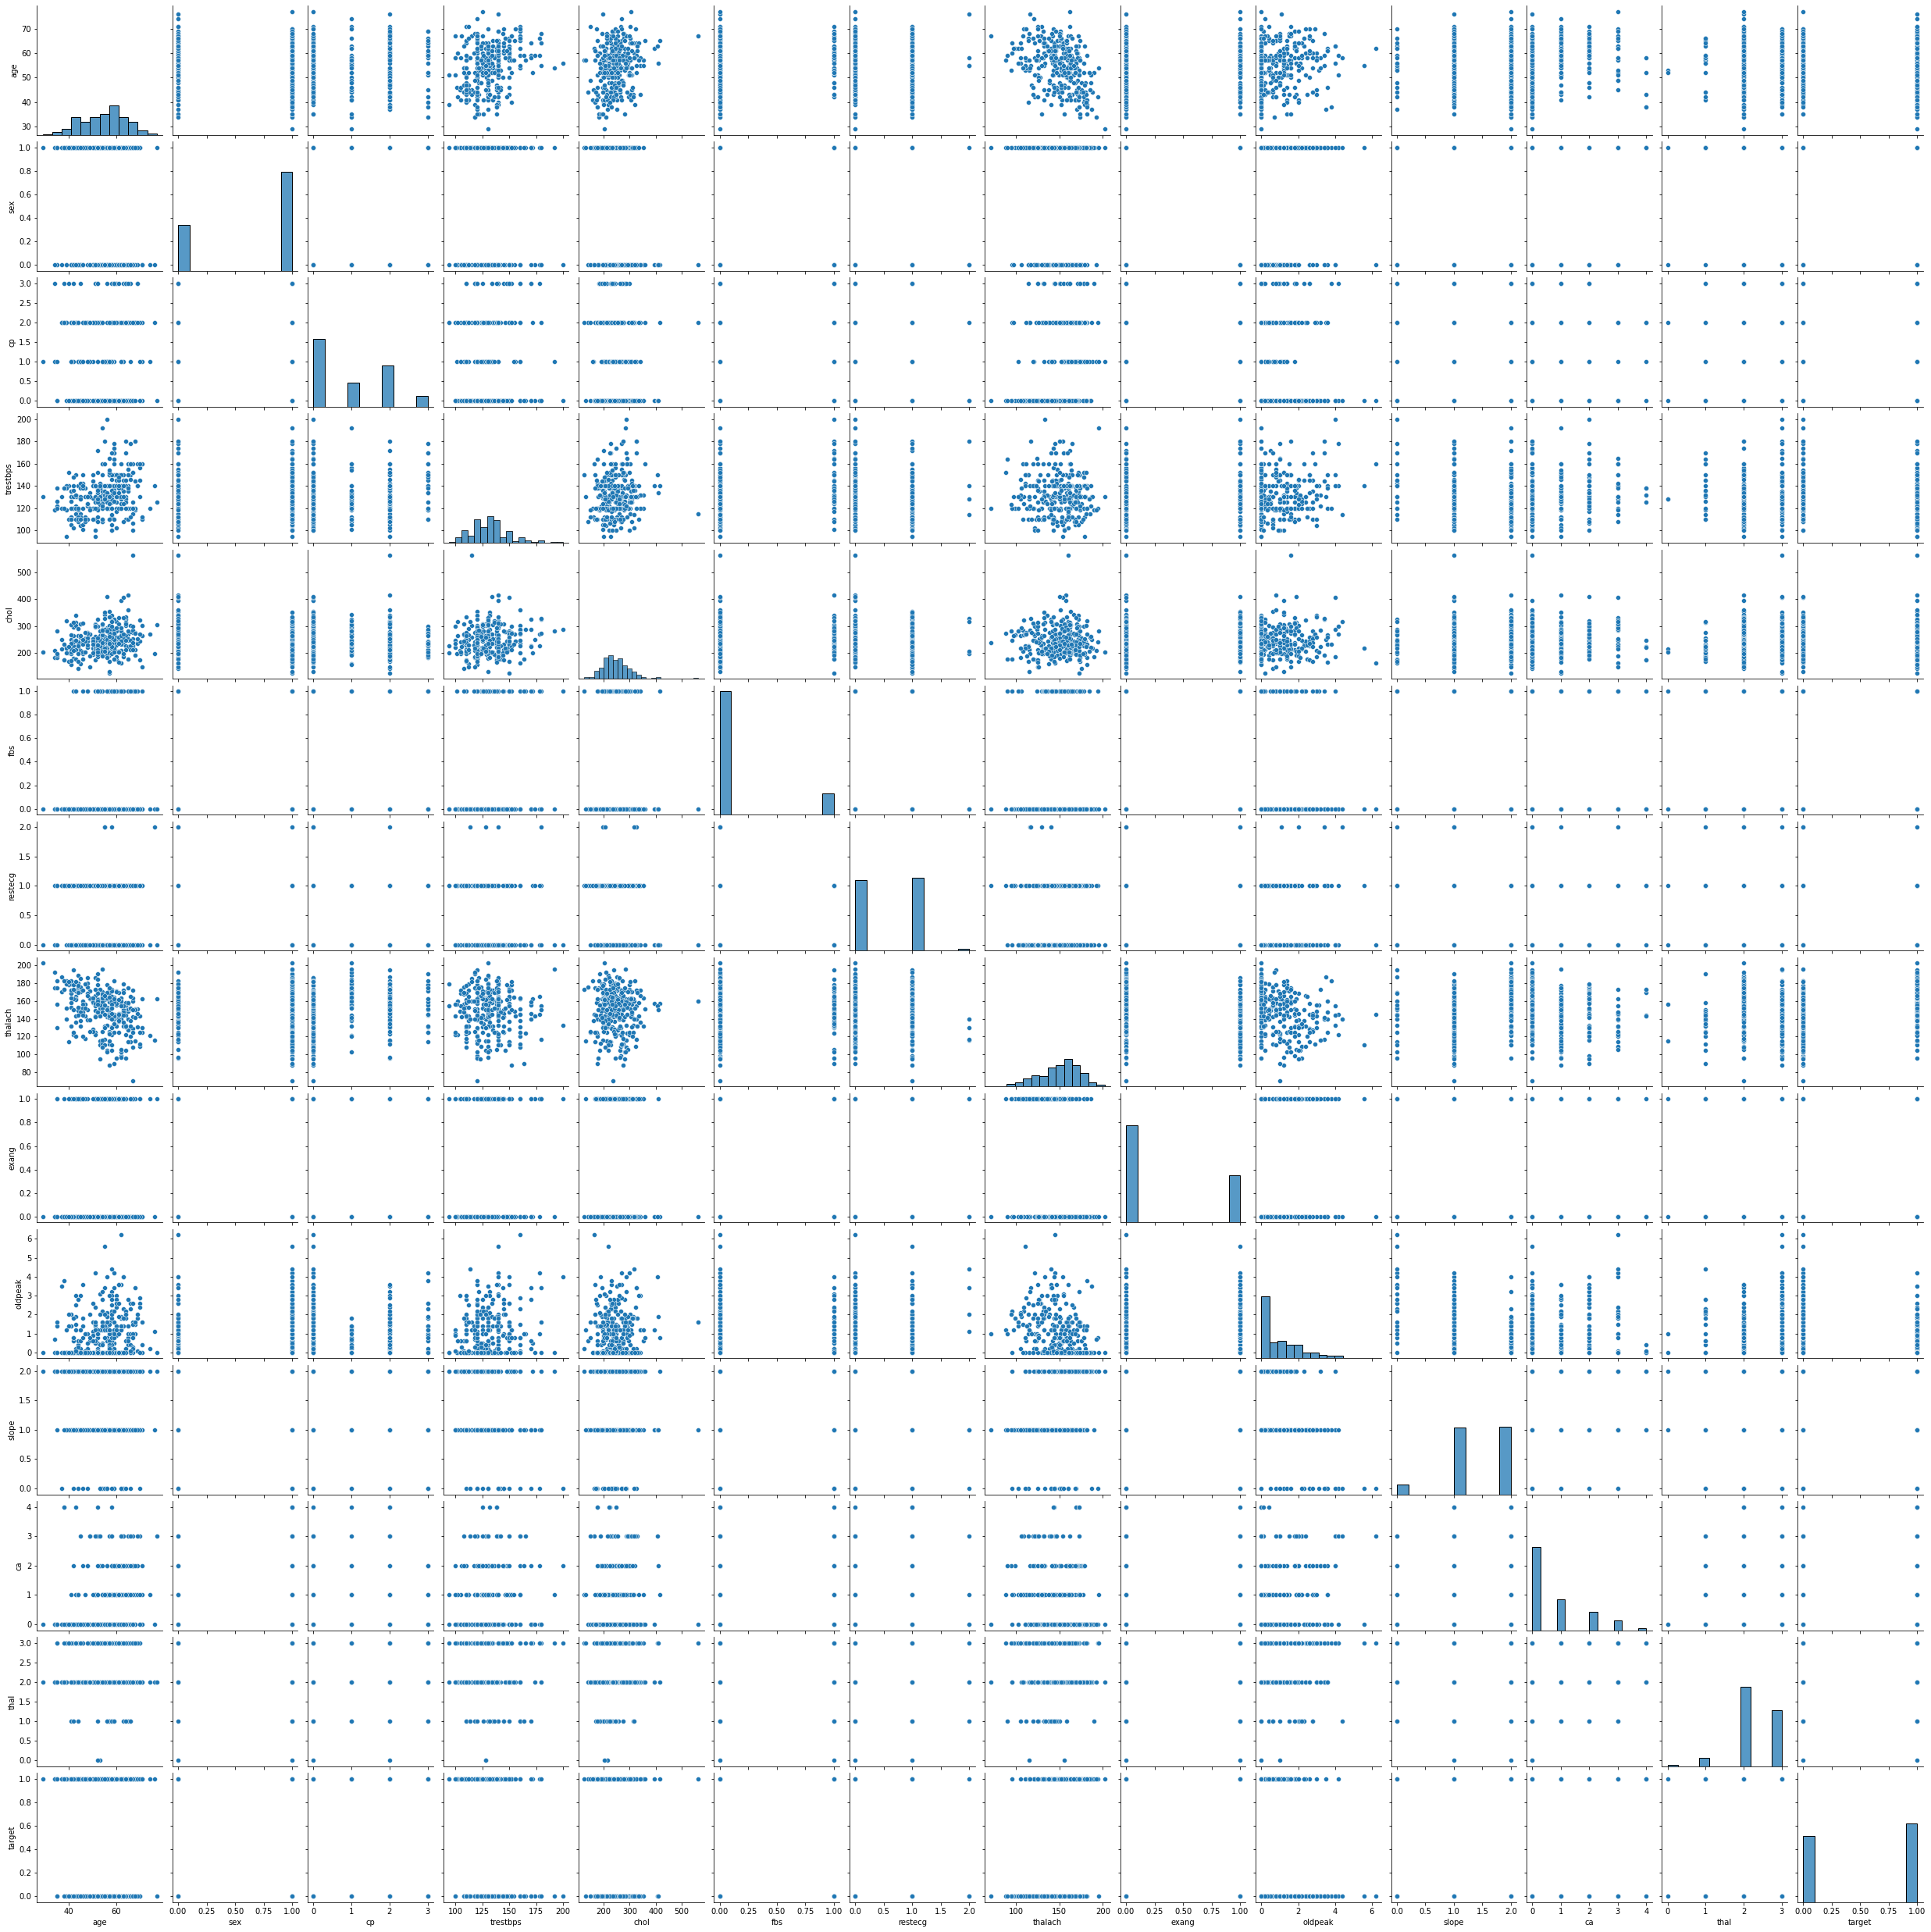

In [20]:
sns.pairplot(data=df)

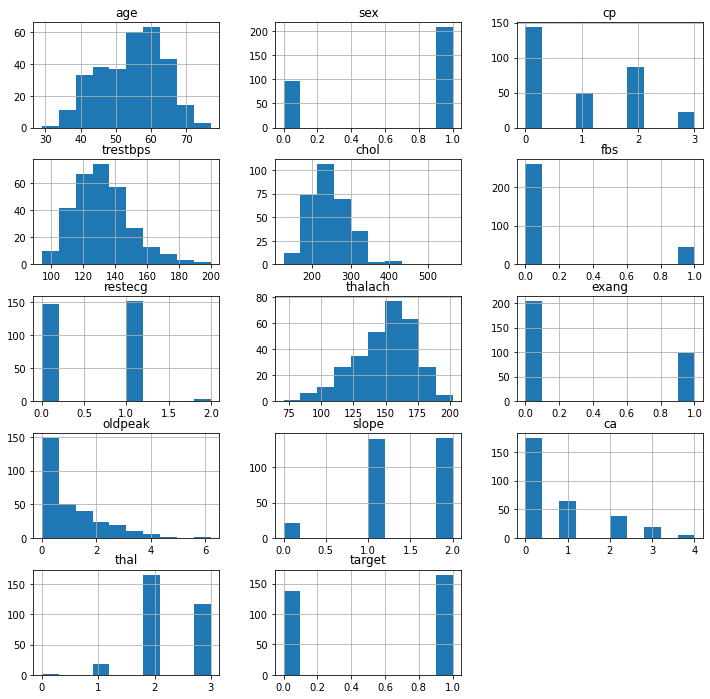

In [21]:
df.hist(figsize=(12,12), layout=(5,3));

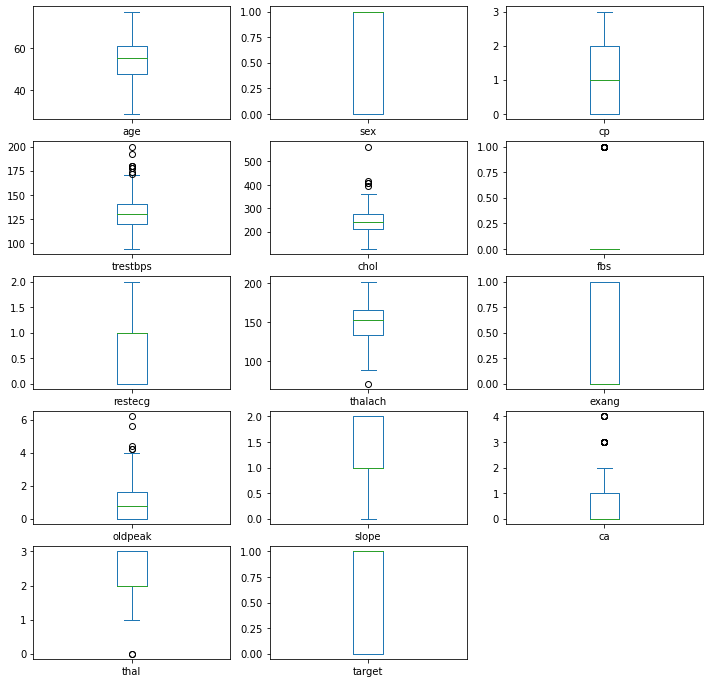

In [22]:
# box and whiskers plot
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

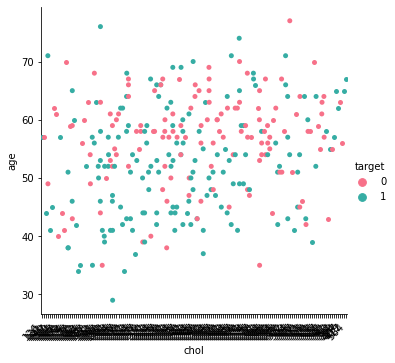

In [23]:
sns.catplot(data=df, x='chol', y='age',  hue='target', palette='husl').set_xticklabels(rotation=45, horizontalalignment='right')

<AxesSubplot:xlabel='sex', ylabel='chol'>

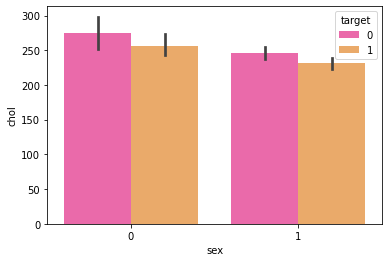

In [24]:
sns.barplot(data=df, x='sex', y='chol', hue='target', palette='spring')

In [25]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

#### 207 males and 96 females

In [26]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

#### 165 cases of heart diseases
and 138 cases of no heart diseases

In [27]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

#### results of thallium stress test measuring blood flow to the heart,
with possible values normal, fixed_defect, reversible_defect

<AxesSubplot:xlabel='sex', ylabel='count'>

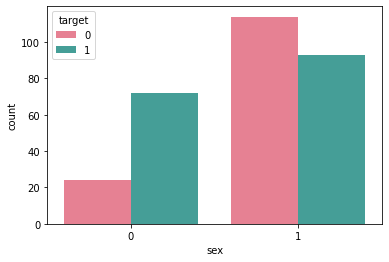

In [28]:
sns.countplot(x='sex', data=df, palette='husl', hue='target')

Here 1 means male and 0 denotes female. 
we observe female having heart disease are comparatively less when compared to males
Males have low heart diseases as compared to females in the given dataset.

<AxesSubplot:xlabel='target', ylabel='count'>

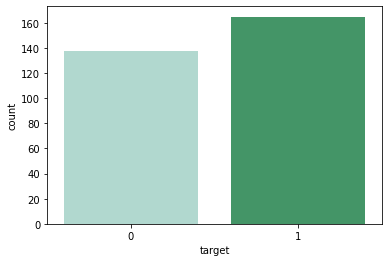

In [29]:
sns.countplot(x='target',palette='BuGn', data=df)

we observe the count for not having heart disease and having heart disease are almost balanced
not having frequency count is 140
and those having heart disease the count is 160.

<AxesSubplot:xlabel='ca', ylabel='count'>

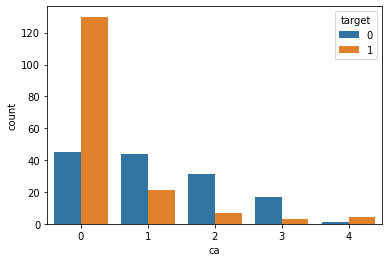

In [30]:
sns.countplot(x='ca',hue='target',data=df)

##### ca : number of major vessels (0-3) colored by flourosopy

In [31]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

ca number of major vessels (0-3) colored by flourosopy
ca has a negative corelation with the target i.e when ca will increase we witness a drop in 
heart diseases and vice versa.

<AxesSubplot:xlabel='thal', ylabel='count'>

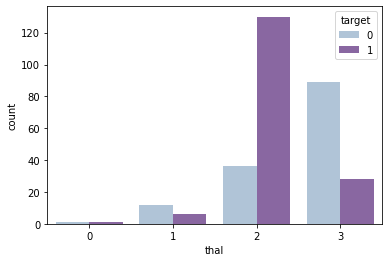

In [32]:
sns.countplot(x='thal',data=df, hue='target', palette='BuPu' )

thal3 = normal; 6 = fixed defect; 7 = reversable defect

<AxesSubplot:xlabel='thal', ylabel='count'>

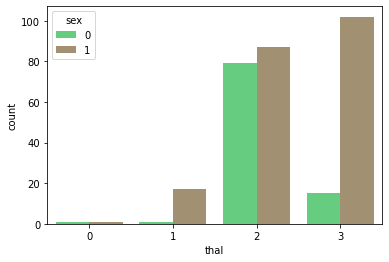

In [33]:
sns.countplot(x='thal', hue='sex',data=df, palette='terrain')

In [34]:
df['cp'].value_counts()  # chest pain type

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='count'>

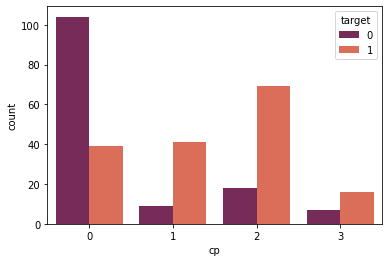

In [35]:
sns.countplot(x='cp' ,hue='target', data=df, palette='rocket')

shows chest pain with respect to heart disease/ target

<AxesSubplot:xlabel='cp', ylabel='count'>

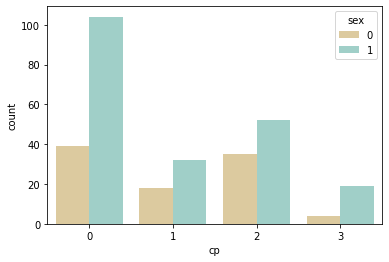

In [36]:
sns.countplot(x='cp', hue='sex',data=df, palette='BrBG')

this shows chest pain count experienced by male and female

<AxesSubplot:xlabel='sex', ylabel='chol'>

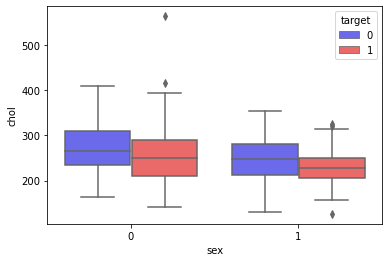

In [37]:
sns.boxplot(x='sex', y='chol', hue='target', palette='seismic', data=df)

we observe the outliers with the help of boxplot. outliers are values that are very small 
or large in the given data set.

<AxesSubplot:xlabel='sex', ylabel='cp'>

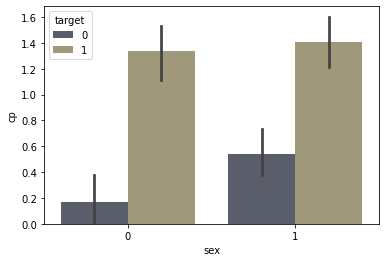

In [38]:
sns.barplot(x='sex', y='cp', hue='target',data=df, palette='cividis')

<AxesSubplot:xlabel='sex', ylabel='thal'>

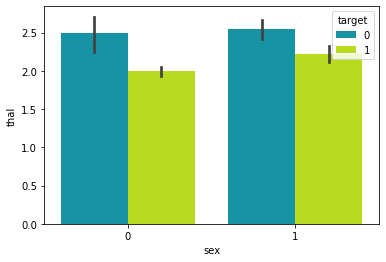

In [39]:
sns.barplot(x='sex', y='thal', data=df, hue='target', palette='nipy_spectral')

<AxesSubplot:xlabel='target', ylabel='ca'>

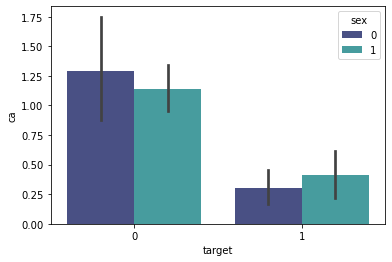

In [40]:
sns.barplot(x='target', y='ca', hue='sex', data=df, palette='mako')

<AxesSubplot:xlabel='sex', ylabel='oldpeak'>

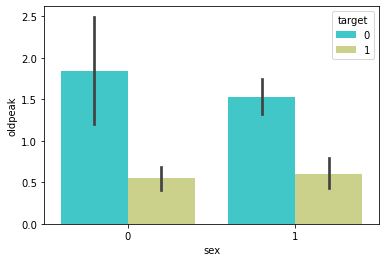

In [41]:
sns.barplot(x='sex', y='oldpeak', hue='target', palette='rainbow', data=df)

##### ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

### fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) and chest pain relation

In [42]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

<AxesSubplot:xlabel='fbs', ylabel='chol'>

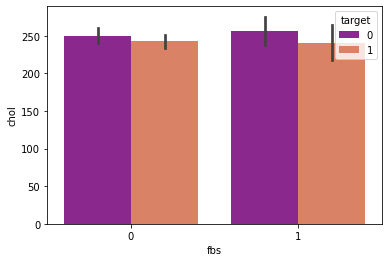

In [43]:
sns.barplot(x='fbs', y='chol', hue='target', data=df,palette='plasma' )

<AxesSubplot:xlabel='sex', ylabel='target'>

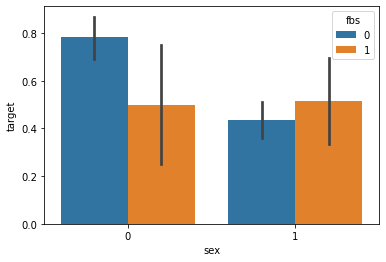

In [44]:
sns.barplot(x='sex',y='target', hue='fbs',data=df)

### Cross Tables

In [45]:
gen = pd.crosstab(df['sex'], df['target'])
print(gen)

target    0   1
sex            
0        24  72
1       114  93


<AxesSubplot:xlabel='sex'>

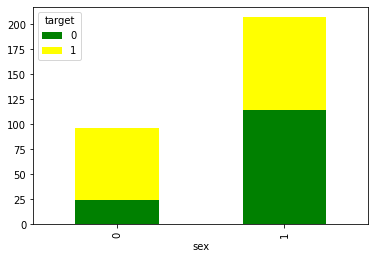

In [46]:
gen.plot(kind='bar', stacked=True, color=['green','yellow'], grid=False)

In [47]:
temp=pd.crosstab(index=df['sex'],
            columns=[df['thal']], 
            margins=True)
temp

thal,0,1,2,3,All
sex,,,,,
0,1,1,79,15,96
1,1,17,87,102,207
All,2,18,166,117,303


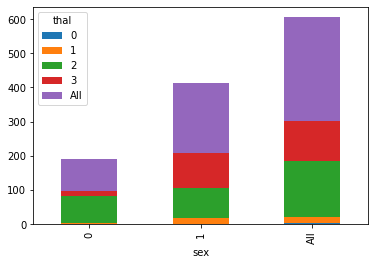

In [48]:
temp.plot(kind="bar",stacked=True)
plt.show()

In [49]:
temp=pd.crosstab(index=df['target'],
            columns=[df['thal']], 
            margins=True)
temp

thal,0,1,2,3,All
target,,,,,
0,1,12,36,89,138
1,1,6,130,28,165
All,2,18,166,117,303


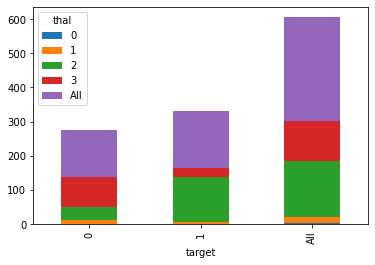

In [50]:
temp.plot(kind='bar', stacked=True)
plt.show()

In [51]:
chest_pain = pd.crosstab(df['cp'], df['target'])
chest_pain

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<AxesSubplot:xlabel='cp'>

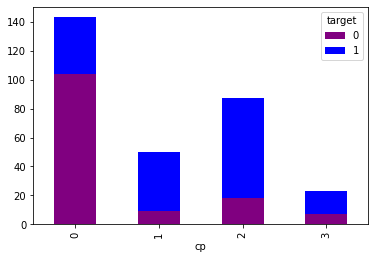

In [52]:
chest_pain.plot(kind='bar', stacked=True, color=['purple','blue'], grid=False)

# Preparing the data for Model Training

### Scaling the data

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
df[columns_to_scale] = StandardScaler.fit_transform(df[columns_to_scale])

In [54]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [55]:
X= df.drop(['target'], axis=1)
y= df['target']

In [56]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

### Check the sample Size

In [57]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 2756
X_test- 1183
y_train- 212
y_test- 91


### 1- Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=5000)

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction1)
cm

array([[36,  4],
       [ 3, 48]], dtype=int64)

<AxesSubplot:>

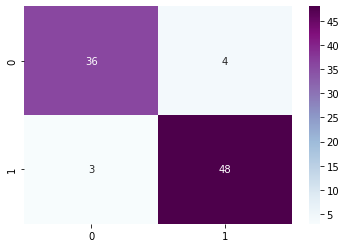

In [60]:
sns.heatmap(cm, annot=True,cmap='BuPu')

In [61]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy:',(TP+TN)/(TP+TN+FN+FP))

Testing Accuracy: 0.9230769230769231


In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction1)

0.9230769230769231

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.92      0.94      0.93        51

    accuracy                           0.92        91
   macro avg       0.92      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91



## 2- Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=1, min_samples_split=2)
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)

In [65]:
cm2

array([[31,  9],
       [16, 35]], dtype=int64)

<AxesSubplot:>

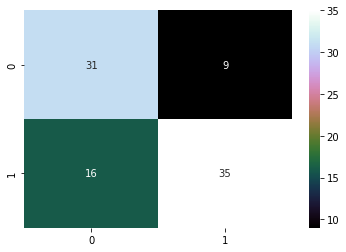

In [66]:
sns.heatmap(cm2, annot=True,cmap='cubehelix')

In [67]:
accuracy_score(y_test,prediction2)

0.7252747252747253

In [68]:
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.66      0.78      0.71        40
           1       0.80      0.69      0.74        51

    accuracy                           0.73        91
   macro avg       0.73      0.73      0.72        91
weighted avg       0.74      0.73      0.73        91



## 3- Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(bootstrap=False,
 max_depth=6,
 max_features='auto',
 min_samples_leaf=1,
 min_samples_split=2,
 n_estimators=10)
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
cm3=confusion_matrix(y_test, prediction3)

<AxesSubplot:>

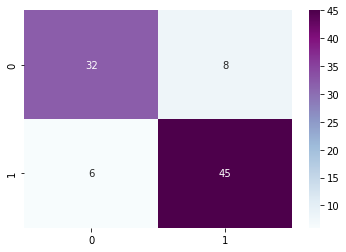

In [70]:
sns.heatmap(cm3, annot=True,cmap='BuPu')

In [71]:
accuracy_score(y_test, prediction3)

0.8461538461538461

In [72]:

print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        40
           1       0.85      0.88      0.87        51

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



### 4- Support Vector Classifier

In [73]:
from sklearn.svm import SVC

svm=SVC()
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction4)

In [74]:
cm4

array([[33,  7],
       [ 2, 49]], dtype=int64)

<AxesSubplot:>

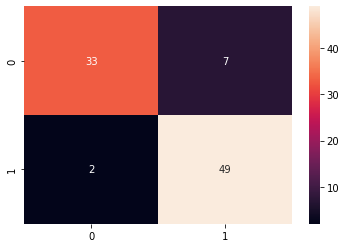

In [75]:
sns.heatmap(cm4, annot=True)

In [76]:
accuracy_score(y_test, prediction4)

0.9010989010989011

In [77]:
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88        40
           1       0.88      0.96      0.92        51

    accuracy                           0.90        91
   macro avg       0.91      0.89      0.90        91
weighted avg       0.90      0.90      0.90        91



### 5- Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB(var_smoothing= 2e-9)
model5 = NB.fit(X_train, y_train)
prediction5 = model5.predict(X_test)
cm5=confusion_matrix(y_test, prediction5)


In [79]:
cm5

array([[35,  5],
       [ 6, 45]], dtype=int64)

<AxesSubplot:>

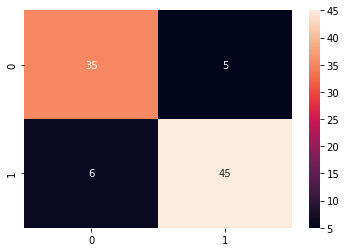

In [80]:
sns.heatmap(cm5, annot=True)

In [81]:
accuracy_score(y_test, prediction5)

0.8791208791208791

In [82]:
print(classification_report(y_test, prediction5))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.90      0.88      0.89        51

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



### 6- KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
model6 = KNN.fit(X_train, y_train)
prediction6 = model6.predict(X_test)
cm6=confusion_matrix(y_test, prediction5)
cm6

array([[35,  5],
       [ 6, 45]], dtype=int64)

<AxesSubplot:>

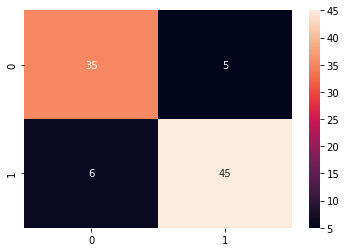

In [84]:
sns.heatmap(cm6, annot=True)

In [85]:
accuracy_score(y_test, prediction6)

0.8351648351648352

In [86]:
print(classification_report(y_test, prediction6))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        40
           1       0.85      0.86      0.85        51

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



### Scores

In [87]:
print('lr :', accuracy_score(y_test, prediction1))
print('dtc :', accuracy_score(y_test, prediction2))
print('rfc :', accuracy_score(y_test, prediction3))
print('NB: ', accuracy_score(y_test, prediction4))
print('SVC :', accuracy_score(y_test, prediction5))
print('KNN :', accuracy_score(y_test, prediction6))

lr : 0.9230769230769231
dtc : 0.7252747252747253
rfc : 0.8461538461538461
NB:  0.9010989010989011
SVC : 0.8791208791208791
KNN : 0.8351648351648352


## Best accuracy is given by Random Forest : 95.7*


## Cross Validation

In [88]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model2, X_train, y_train, cv=5)
scores.mean()

0.7364341085271319

In [89]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model3, X_train, y_train, cv=5)
scores.mean()

0.7644518272425248

### Random Forest Model with Hyperparameter tuning using GridSearchCV

In [90]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4, 6, 8]
# Minimum number of samples required to split a node
min_samples_split = [2, 50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [91]:
# Create the paramaters grid
param_grid_1 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid_1)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8], 'min_samples_split': [2, 50], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [92]:
from sklearn.model_selection import GridSearchCV
E_model_1 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid_1, cv = 3, verbose=5, n_jobs = -1)
E_model_1

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 50],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=5)

In [93]:
E_model_1.fit(X_train, y_train)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 50],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=5)

In [94]:
# print(accuracy_score(y_test, E_predicted_1))
E_model_1.best_score_

0.8539235412474849

In [95]:
E_model_1.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 33}

In [96]:
E_prediction_1=E_model_1.predict(X_test)
accuracy_score(y_test, E_prediction_1)

0.8901098901098901

### Decision Tree Classifier with Hyperparameter tuning using GridSearchCV

In [97]:
param_grid_2={
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10),
    'min_samples_split': range(1, 10),
    'min_samples_leaf': range(1, 5)
}

In [98]:
from sklearn.model_selection import GridSearchCV
E_model_2=GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_2, cv=10, n_jobs=-1)

In [99]:
E_model_2.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)})

In [100]:
E_prediction_2=E_model_2.predict(X_test)
accuracy_score(y_test, E_prediction_2)

0.7692307692307693

In [101]:
E_model_2.best_score_

0.7837662337662338

In [102]:
E_model_2.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

### Adaboost Classifier with Hyperparameter tuning using GridSearchCV

In [103]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
ADC=AdaBoostClassifier(n_estimators=150, learning_rate=1.5)
E_model_3=ADC.fit(X_train, y_train)
E_predicted_3=E_model_3.predict(X_test)
accuracy_score(y_test, E_predicted_3)

0.7802197802197802

In [104]:
# Applying GridSearchCV
param_grid_3={
    'n_estimators': [10, 50, 75, 100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1, 1.5, 2],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [105]:
E_model_3=GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid_3, n_jobs=-1, cv=10, scoring='accuracy')

In [106]:
E_model_3.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 1.5, 2],
                         'n_estimators': [10, 50, 75, 100, 150, 200]},
             scoring='accuracy')

In [107]:
E_prediction_3=E_model_3.predict(X_test)
accuracy_score(y_test, E_prediction_3)

0.8681318681318682

In [108]:
E_model_3.best_score_

0.8162337662337661

In [109]:
E_model_3.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 50}

### Gradient Boost Classifier with Hyperparameter tuning using GridSearchCV

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
GBC=GradientBoostingClassifier(n_estimators=16, learning_rate=1.59)
GradientBoostingClassifier()
E_model_4=GBC.fit(X_train, y_train)
E_predicted_4=E_model_4.predict(X_test)
accuracy_score(y_test, E_predicted_4)

0.8131868131868132

In [111]:
#Applying GrirSearchCV
param_grid_4={
    'n_estimators': [10, 50, 75, 100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.5, 1.0, 1.5]
}

In [112]:
E_model_4=GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid_4, n_jobs=-1, cv=10, scoring='accuracy')
E_predicted_4=E_model_4.fit(X_train, y_train)

In [113]:
E_model_4.best_score_

0.8028138528138526

In [114]:
E_model_4.best_params_

{'learning_rate': 0.05, 'n_estimators': 75}

In [115]:
print(E_model_4)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.5, 1.0, 1.5],
                         'n_estimators': [10, 50, 75, 100, 150, 200]},
             scoring='accuracy')


### XgBoost Classifier with Hyperparameter tuning using GridSearchCV

In [116]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [117]:
from xgboost import XGBClassifier
XGB=XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=45)
E_model_5=XGB.fit(X_train, y_train)
E_predicted_5=E_model_5.predict(X_test)
accuracy_score(y_test, E_predicted_5)

0.8241758241758241

In [118]:
# Applying GridSearchCV
param_grid_5={
    'n_estimators': [10, 50, 75, 100, 175, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.4, 0.5, 0.6],
    'max_depth': [1, 2, 3, 4, 5, 6]
}

In [119]:
E_model_5=GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid_5, verbose=1, n_jobs=-1, cv=5)
E_predicted_5=E_model_5.fit(X_train, y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


In [120]:
E_model_5.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50}

In [121]:
E_model_5.best_score_

0.8256921373200443

### LGBM Classifier with Hyperparameter tuning using GridSearchCV

In [122]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [123]:
from lightgbm import LGBMClassifier

In [124]:
LGB=LGBMClassifier(n_estimators=45, learning_rate=0.065, num_leaves=30, random_state=42, objective='binary')
E_model_6=LGB.fit(X_train, y_train)
E_predicted_6=E_model_6.predict(X_test)
accuracy_score(y_test, E_predicted_6)



0.8351648351648352

In [125]:
# Applying GridSearchCV
param_grid_6={
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.05, 0.1, 0.3],
    'num_leaves': [20, 50, 80, 100]
}

In [126]:
E_model_6=GridSearchCV(estimator=LGBMClassifier(), param_grid=param_grid_6, verbose=1, n_jobs=-1, cv=10)
E_predicted_6=E_model_6.fit(X_train, y_train)


Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [127]:
E_model_6.best_params_

{'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 20}

In [128]:
E_model_6.best_score_

0.7978354978354979

## AUC for Ensemble Learning Models

In [129]:
from sklearn.metrics import roc_curve,roc_auc_score

### Random Forest

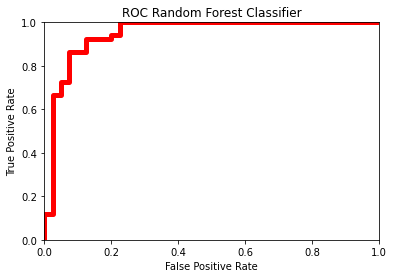

In [130]:
fpr, tpr, thresholds = roc_curve(y_test, E_model_1.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

### Decision Tree Classifier

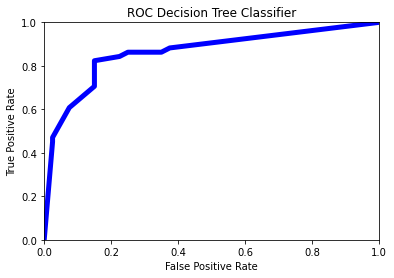

In [131]:
fpr, tpr, thresholds = roc_curve(y_test, E_model_2.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr,color='blue',lw=5)
plt.show()

### AdaBoost Classifier

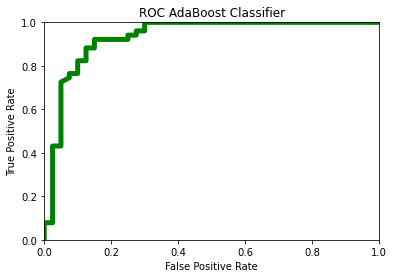

In [132]:
fpr, tpr, thresholds = roc_curve(y_test, E_model_3.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC AdaBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr,color='green',lw=5)
plt.show()

### GradientBoosting Classifier

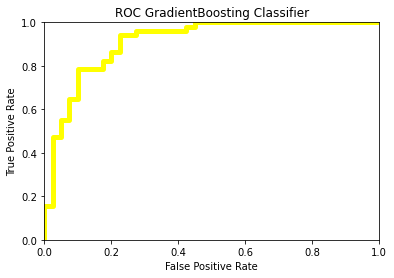

In [133]:
fpr, tpr, thresholds = roc_curve(y_test, E_model_4.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC GradientBoosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr,color='yellow',lw=5)
plt.show()

### XgBoost Classifier

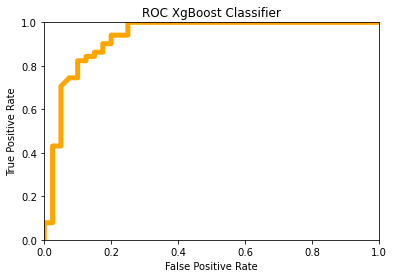

In [134]:
fpr, tpr, thresholds = roc_curve(y_test, E_model_5.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC XgBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr,color='orange',lw=5)
plt.show()

### Light GBMClassifier

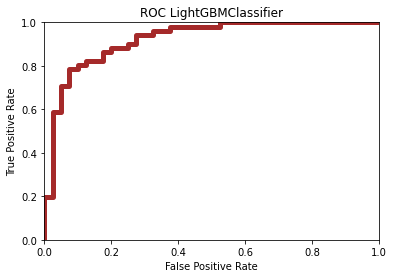

In [135]:
fpr, tpr, thresholds = roc_curve(y_test, E_model_6.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC LightGBMClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr,color='brown',lw=5)
plt.show()

## Analysis of Models

In [136]:
names=["Logistic Regression", "Decision Tree Classifier", "Random Forest", "Linear_SVM", "Polynomial_SVM", 
         "RBF_SVM", "Naive_Bayes", "KNN", "Logistic Regression_CV", 
         "Decision Tree_CV", "Adaboost_CV", "Gradient Boost_CV", "XgBoost_CV", "LGMB_CV"]


In [137]:
classifiers=[
    LogisticRegression(max_iter=5000),
    DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=1, min_samples_split=2),
    RandomForestClassifier(bootstrap=False, max_depth=6, max_features='auto', min_samples_leaf=1, min_samples_split=2, n_estimators=10),
    SVC(kernel='linear'),
    SVC(kernel='poly'),
    SVC(kernel='rbf'),
    GaussianNB(var_smoothing= 2e-9),
    KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski'),
    GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid_1, cv = 3, verbose=5, n_jobs = -1),
    GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_2, cv=10, n_jobs=-1),
    GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid_3, n_jobs=-1, cv=10, scoring='accuracy'),
    GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid_5, verbose=1, n_jobs=-1, cv=5),
    GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid_4, n_jobs=-1, cv=10, scoring='accuracy'),
    GridSearchCV(estimator=LGBMClassifier(), param_grid=param_grid_6, verbose=1, n_jobs=-1, cv=10)
]

In [138]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits
Fitting 5 folds for each of 252 candidates, totalling 1260 fits
Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [139]:
scores

[0.9230769230769231,
 0.6813186813186813,
 0.8461538461538461,
 0.9120879120879121,
 0.8351648351648352,
 0.9010989010989011,
 0.8791208791208791,
 0.8351648351648352,
 0.8571428571428571,
 0.7582417582417582,
 0.8681318681318682,
 0.8571428571428571,
 0.8241758241758241,
 0.8461538461538461]

In [140]:
df_stat = pd.DataFrame()
df_stat['name'] = names
df_stat['score'] = scores
df_stat

,name,score
0,Logistic Regression,0.923077
1,Decision Tree Classifier,0.681319
2,Random Forest,0.846154
3,Linear_SVM,0.912088
4,Polynomial_SVM,0.835165
5,RBF_SVM,0.901099
6,Naive_Bayes,0.879121
7,KNN,0.835165
8,Logistic Regression_CV,0.857143
9,Decision Tree_CV,0.758242


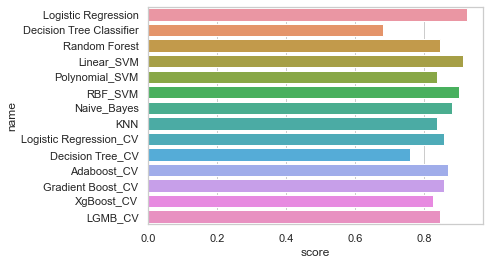

In [141]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df_stat)